# Principal Components Analysis (PCA)

Implement PCA on database. Output the proportion of variance explained by all components
Visualize a component of the PCA 


We start by loading the dataset found in the file 'diatoms.txt', which contains a set of *diatom* outlines. A diatom is a type of algae, whose species is strongly correlated with its outline shape; in the following, we will be using these outlines as a descriptive feature of the diatom.

#features
The file 'diatoms.txt' contains 780 diatoms described by 90 successive "landmark points" (x_i, y_i) along the outline, recorded as (x_0, y_0, x_1, y_1, ..., x_89, y_89).

#The class through 1-37
The file 'diatoms_classes.txt' contains one class assignment per diatom, into species classified by the integers 1-37.

In [1]:
import numpy as np

diatoms = np.loadtxt('diatoms.txt', delimiter=',').T
diatoms_classes = np.loadtxt('diatoms_classes.txt', delimiter=',')
print('Shape of diatoms:', diatoms.shape)
print('Shape of diatoms_classes:', diatoms_classes.shape)
#print('Classes:\n', diatoms_classes)

d,N = diatoms.shape
print('Dimension:', d)
print('Sample size:', N)

Shape of diatoms: (180, 780)
Shape of diatoms_classes: (780,)
Dimension: 180
Sample size: 780


Here's a function that will plot a given diatom. Let's try it on the first diatom in the dataset.

In [2]:
import matplotlib.pyplot as plt

def plot_diatom(diatom):
    xs = np.zeros(91)
    ys = np.zeros(91)
    for i in range(90):
        xs[i] = diatom[2*i]
        ys[i] = diatom[2*i+1]
    
    # Loop around to first landmark point to get a connected shape
    xs[90] = xs[0]
    ys[90] = ys[0]
    
    plt.plot(xs, ys)    
    plt.axis('equal')   

plot_diatom(diatoms[:,0])

Computing the mean diatom

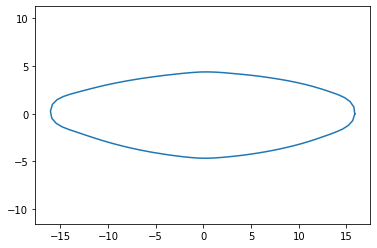

In [3]:
mean_diatom = np.mean(diatoms, 1)
plot_diatom(mean_diatom)

Noramilize data subtracting the mean shape. Can use Procrustes Analysis or other more complex types of normalization

In [4]:
import numpy.matlib

def pca(data):
    data_cent = data - np.mean(data, axis = 1).reshape((-1,1)) #substracting mean shape
    #Compute the covariance
    covM = np.cov(data_cent)
    #Eigen values and eigen vectors
    PCevals, PCevecs = np.linalg.eigh(covM)
    PCevals = PCevals[::-1] # get them in decreasing order
    PCevecs = np.flip(PCevecs,1)#flip them so they match their eigenvalues
    return PCevals, PCevecs, data_cent

PCevals, PCevecs, data_cent = pca(diatoms)
# PCevals is a vector of eigenvalues in decreasing order. To verify, uncomment:
#print(PCevals)
# PCevecs is a matrix whose columns are the eigenvectors listed in the order of decreasing(shouldnt it be so they match eigenvalues) eigenvectors
#print(PCevecs)

***Recall:***
* The eigenvalues represent the variance of the data projected to the corresponding eigenvectors. 
* Thus, the 2D linear subspace with highest projected variance is spanned by the eigenvectors corresponding to the two largest eigenvalues.
* We extract these eigenvectors and plot the data projected onto the corresponding space.

How many components are needed to cover a certain part of the results in the data.
coverageArr : Put the desired percentage of the data that you want to cover

to cover  90.0 % of the results, the first  2 / 180 components are needed
to cover  95.0 % of the results, the first  3 / 180 components are needed
to cover  99.0 % of the results, the first  8 / 180 components are needed
to cover  99.9 % of the results, the first  27 / 180 components are needed
to cover  100.0 % of the results, the first  180 / 180 components are needed


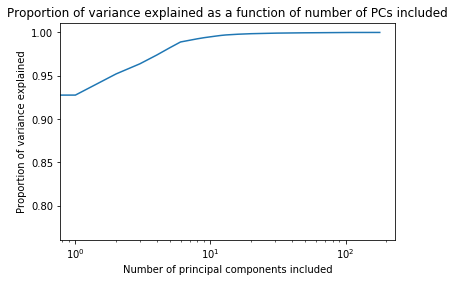

In [5]:
import math

variance_explained_per_component = PCevals/np.sum(PCevals)
#https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
cumulative_variance_explained = np.cumsum(variance_explained_per_component)



# Let's print out the proportion of variance explained by the first 10 PCs
#d is the dimension
percentageCovered = []
coverageArr = ([0.90, 0.95, 0.99, 0.999, 1.0])

lengthArr = len(coverageArr)
indexCoverageArr = 0
for i in range(d):
    val = cumulative_variance_explained[i]
    #print('Proportion of variance explained by the first '+str(i+1)+' principal components:', val, '\n')
    if indexCoverageArr < lengthArr and coverageArr[indexCoverageArr] < val :
        percentageCovered.append(i+1)
        indexCoverageArr += 1

for i in range(len(percentageCovered)):
     print("to cover ",coverageArr[i]*100,
           "% of the results, the first ", percentageCovered[i],"/",d,"components are needed")
        
plt.xscale("log")
plt.plot(cumulative_variance_explained)
plt.xlabel('Number of principal components included')
plt.ylabel('Proportion of variance explained')
plt.title('Proportion of variance explained as a function of number of PCs included')
plt.savefig('variancePC.png')

Plot mean diatom shape with added 'wantedDiatom' eigenvector mulitplied by [-5,-3,-2,-1,0,1,2,3,5] standard deviations corresponding to this eigenvector.

2.5555563669644887


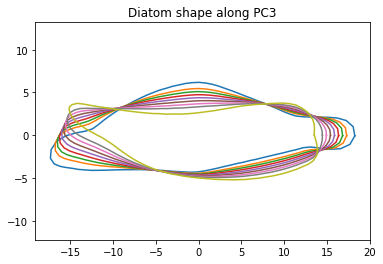

In [41]:
wantedDiatom = 3
eigenvector = PCevecs[:, wantedDiatom-1] # gets the fourth eigenvector
lambdaValue = PCevals[wantedDiatom-1] # gets the wantedDiatom eigenvalue
# In case the naming std is confusing -- the eigenvalues have a statistical interpretation
std = np.sqrt(lambdaValue)
print(std)
multipliedSD = [-5,-3,-2,-1,0,1,2,3,5]

diatoms_along_pc = np.zeros((len(multipliedSD), 180))
for i in range(len(multipliedSD)):
    for j in range(180):
        diatoms_along_pc[i][j] = mean_diatom[j] + eigenvector[j] * multipliedSD[i] * std 
    
for i in range(len(multipliedSD)):
    plot_diatom(diatoms_along_pc[i])

titleFig = "Diatom shape along PC" + str(wantedDiatom)
plt.title(titleFig)
titlePng = titleFig + ".png"
plt.savefig(titlePng)